# Neural Networks - Case Study II

## Predicting Chances of Surviving the Titanic Disaster

### Project Scope:

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Your Role:**

Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: **Survived** 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 80% and above

### **Data Dictionary:**

The dataset contains several parameters which were recorded about the passengers.
The parameters included are : 

**PassengerId:** Passenger Identifier\
**Survived:** (0 = No, 1 = Yes) \
**Pclass:** - Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd) \
**Name** - Name of the Passenger\
**Sex:**  Gender of the passenger \
**Age:** Age in years  \
**SibSp:** No. of siblings / spouses aboard the Titanic \
**Parch:** No. of parents / children aboard the Titanic \
**Ticket:** Ticket Number \
**Fare:** Passenger Fare\
**Embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)\
**Cabin:**
* U refers to the cabins for the crew members, located in the lower levels of the ship.\
* C, E, and G refers to the cabins for third-class passengers, with C being the highest and G being the lowest level.\
* D refers to the cabins for second-class passengers.\
* A, B, and F refers to the cabins for first-class passengers, with A being the most luxurious and F being the least luxurious.\
* T refers to the cabins for passengers traveling with their automobiles, as the Titanic had a special deck where cars could be loaded and unloaded.

### **Loading the libraries and the dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

#from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# load the train.csv file using the pandas `read_csv()` function. 
df = pd.read_csv('Titanic_train.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,U,C
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,U,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,U,S
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D,S
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,U,S
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,U,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,U,C
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A,C
463,464,0,2,"Milling, Mr. Jacob Christian",male,48.0,0,0,234360,13.0000,U,S


#### What features do you think contribute to a high survival rate ?

In [4]:
# Drop the unnecessary ones
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [5]:
# explore the data quickly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


#### The training set has 891 examples and 11 features + the target variable (survived).

In [6]:
# look at some summary stats
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observation:**
* we can see that 38 % out of the training-set survived the Titanic
* Age of passengers is between 4 months & 80 years 

In [8]:
df.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

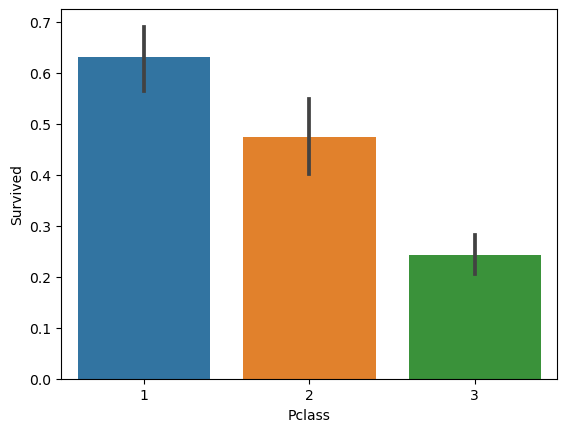

In [14]:
# check if passenger class has anything to do with survival. Plot a bar plot of Pclass vs Survived
sns.barplot(x='Pclass',y='Survived',data=df)

In [15]:
df_survived = df[df.Survived == 1]

<AxesSubplot:xlabel='Pclass', ylabel='count'>

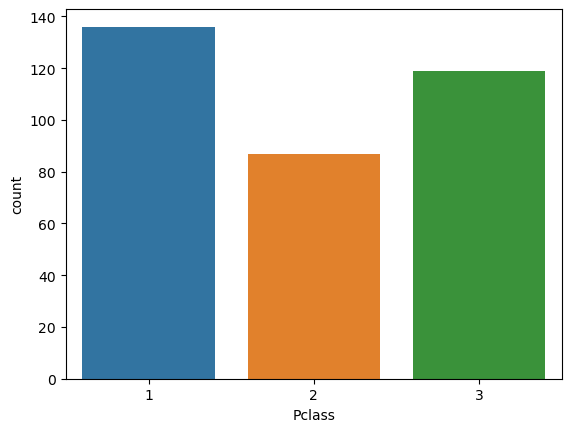

In [16]:
sns.countplot(data=df_survived,x='Pclass')

In [10]:
# calculate the correlation of all features with target variable
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


### Data Prep Required

1. convert object type features into numeric ones.
2. features have different ranges, convert into roughly the same scale. 
3. Some features contain missing values (NaN = not a number) that need to be replaced.

In [18]:
# check for missing data
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [28]:
# replace nan with mean of Age. (Not Advised)
df.Age.fillna(df.Age.mean(),inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [31]:
# Create dummy variables for all 'object' type variables 
df = pd.get_dummies(data=df,columns=['Sex','Cabin','Embarked'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [32]:
# saving this processed dataset
df.to_csv('Processed_Titanic_Dataset.csv', index=None)

### Data Partition

In [69]:
# Seperate the input features and target variable
x = df.drop('Survived', axis=1)
y = df['Survived']

In [87]:
x

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,0,0,0,0,0,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,0,0,0,0,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,1,0,0,1,0,0,0,0,0,0,1,0,0


In [70]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size=0.2,random_state=100)

In [71]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 19), (179, 19), (712,), (179,))

## **Models**

In [72]:
# Train the model
model = MLPClassifier(hidden_layer_sizes=(4,3), max_iter=600)

In [73]:
model.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(4, 3), max_iter=600)

In [74]:
# predict on xtrain
ypred_train = model.predict(x_train)
ypred_train

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,

In [75]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(ypred_train, y_train),'\n')
print(confusion_matrix(y_train, ypred_train))

0.8202247191011236 

[[382  57]
 [ 71 202]]


In [76]:
# predict on xtest
ypred_test = model.predict(x_test)
ypred_test

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [92]:
print(accuracy_score(ypred_test, y_test),'\n')
print(confusion_matrix(y_test, ypred_test))

0.8324022346368715 

[[92 18]
 [12 57]]


In [88]:
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
452,1,30.0,0,0,27.7500,0,1,0,0,1,0,0,0,0,0,0,1,0,0
835,1,39.0,1,1,83.1583,1,0,0,0,0,0,1,0,0,0,0,1,0,0
781,1,17.0,1,0,57.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
120,2,21.0,2,0,73.5000,0,1,0,0,0,0,0,0,0,0,1,0,0,1
801,2,31.0,1,1,26.2500,1,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,2,39.0,0,0,26.0000,0,1,0,0,0,0,0,0,0,0,1,0,0,1
302,3,19.0,0,0,0.0000,0,1,0,0,0,0,0,0,0,0,1,0,0,1
435,1,14.0,1,2,120.0000,1,0,0,1,0,0,0,0,0,0,0,0,0,1
217,2,42.0,1,0,27.0000,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [78]:
# Load your test set
df2 = pd.read_csv('Titanic_test.csv')

In [79]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S


In [81]:
# Drop the unnecessary ones
df2.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [82]:
# check for missing data
df2.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         0
Cabin        0
Embarked     0
dtype: int64

In [83]:
# replace nan with mean of Age. (Not Advised)
df2.Age.fillna(df2.Age.mean(),inplace=True)

In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    object 
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Cabin     417 non-null    object 
 7   Embarked  417 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [85]:
# Create dummy variables for all 'object' type variables 
df2 = pd.get_dummies(data=df2,columns=['Sex','Cabin','Embarked'])
df2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,0,0,0,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,0,0,0,0,0,1,0,0,1


In [89]:
df2['Cabin_T'] = 0

In [94]:
x_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [95]:
df2.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_U', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Cabin_T'],
      dtype='object')

In [96]:
cols = list(x_train.columns)
cols

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Cabin_A',
 'Cabin_B',
 'Cabin_C',
 'Cabin_D',
 'Cabin_E',
 'Cabin_F',
 'Cabin_G',
 'Cabin_T',
 'Cabin_U',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [97]:
df2 = df2.reindex(columns=cols)

In [98]:
df2.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,0,0,0,0,0,0,0,0,1,0,1,0
1,3,47.0,1,0,7.0000,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,62.0,0,0,9.6875,0,1,0,0,0,0,0,0,0,0,1,0,1,0
3,3,27.0,0,0,8.6625,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,3,22.0,1,1,12.2875,1,0,0,0,0,0,0,0,0,0,1,0,0,1


In [99]:
model.predict(df2)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,